logistic regression 
import the packages 

In [51]:
#numerical values
import numpy as np
#data analysis
import pandas as pd
#plots and graphs
import matplotlib.pyplot as plt
from  scipy.optimize import minimize as opt
#heatmap (correlation function)
import seaborn as sns
from utils import *
import copy
import math
import csv 
%matplotlib inline
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report



problem statement
applying logistic regression to predict if a given email url is legitimate or a phishing url. 

load and visualize the data


In [52]:
dataset_phishing=pd.read_excel("Phishing_Legitimate_full.xlsx")
dataset_phishing.head()


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


define x and y labels
x has multiple parameters(49)
y has class label(in training= 1 for phishing and 0 for ligitimate)

In [53]:

x=dataset_phishing.iloc[:, 1:-1]
y = dataset_phishing['CLASS_LABEL']

In [54]:
x.shape

(10000, 48)

In [55]:
x.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

In [56]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NumDots                             10000 non-null  int64  
 1   SubdomainLevel                      10000 non-null  int64  
 2   PathLevel                           10000 non-null  int64  
 3   UrlLength                           10000 non-null  int64  
 4   NumDash                             10000 non-null  int64  
 5   NumDashInHostname                   10000 non-null  int64  
 6   AtSymbol                            10000 non-null  int64  
 7   TildeSymbol                         10000 non-null  int64  
 8   NumUnderscore                       10000 non-null  int64  
 9   NumPercent                          10000 non-null  int64  
 10  NumQueryComponents                  10000 non-null  int64  
 11  NumAmpersand                        10000 

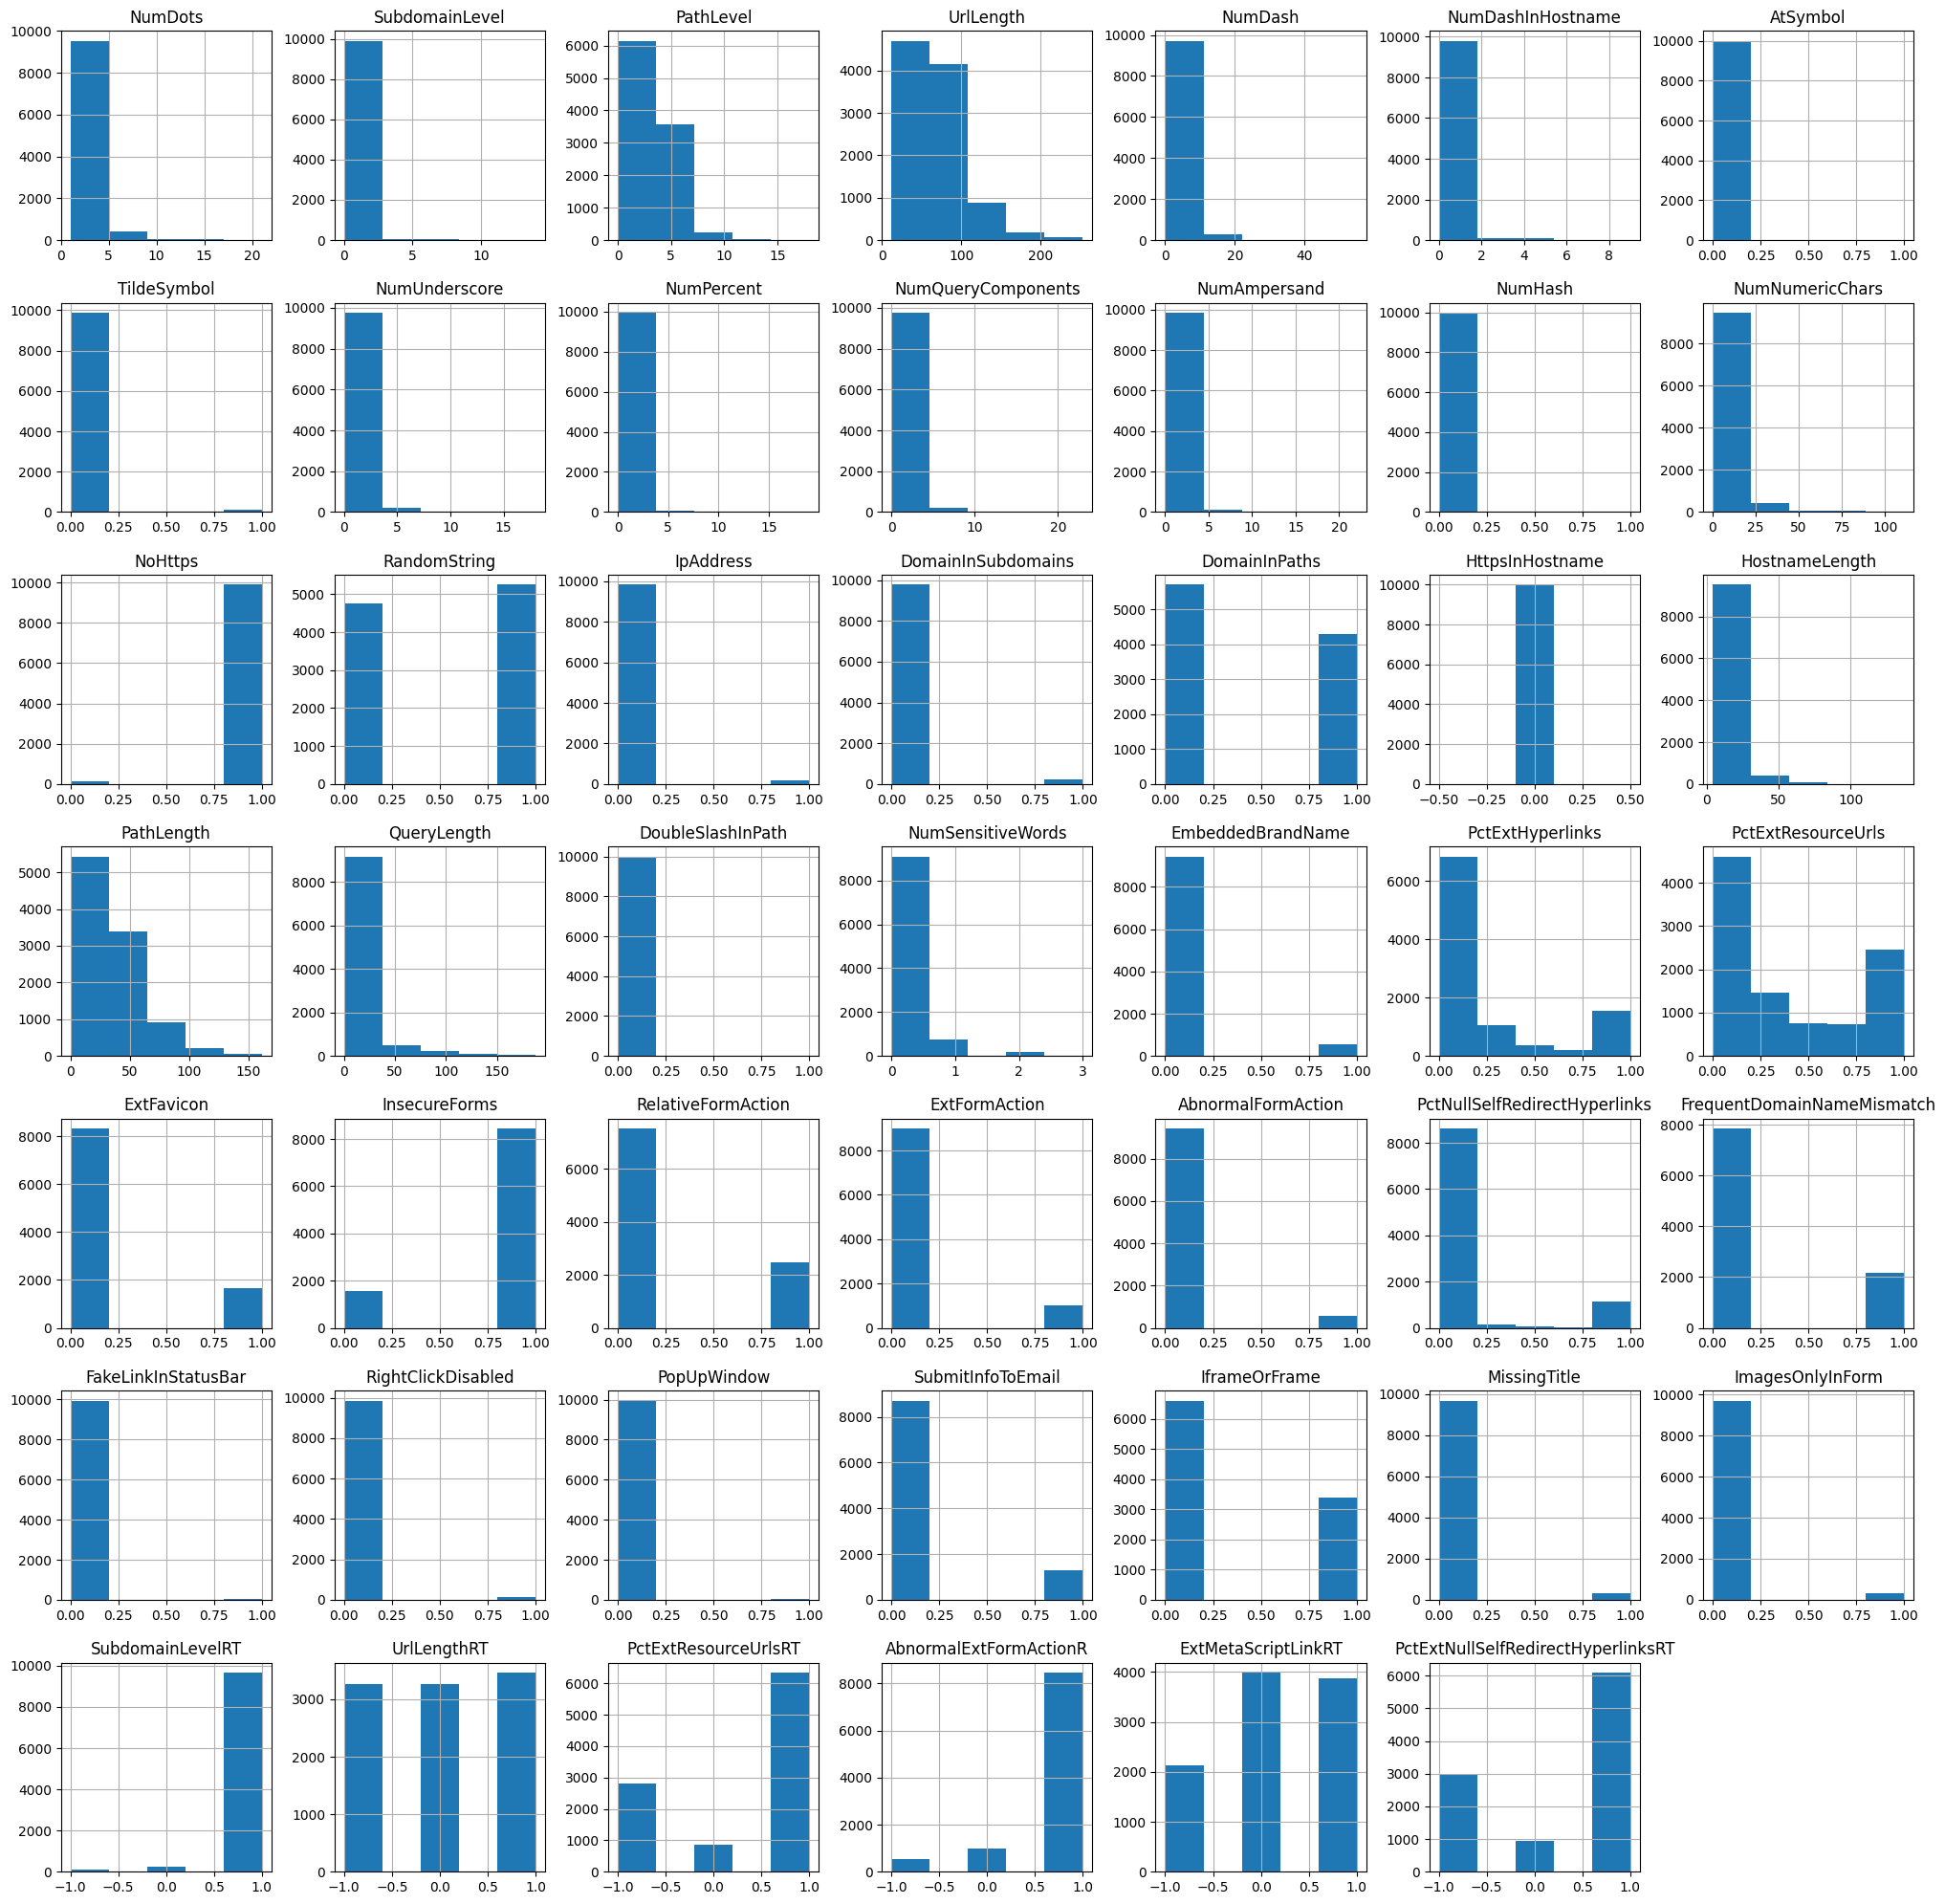

In [57]:
#frequency of values occuring in a data column
#a count of the number of observations in each bin created for visualization
#helps us see possible outliers
x.hist(bins = 5,figsize = (25,25))
plt.show()

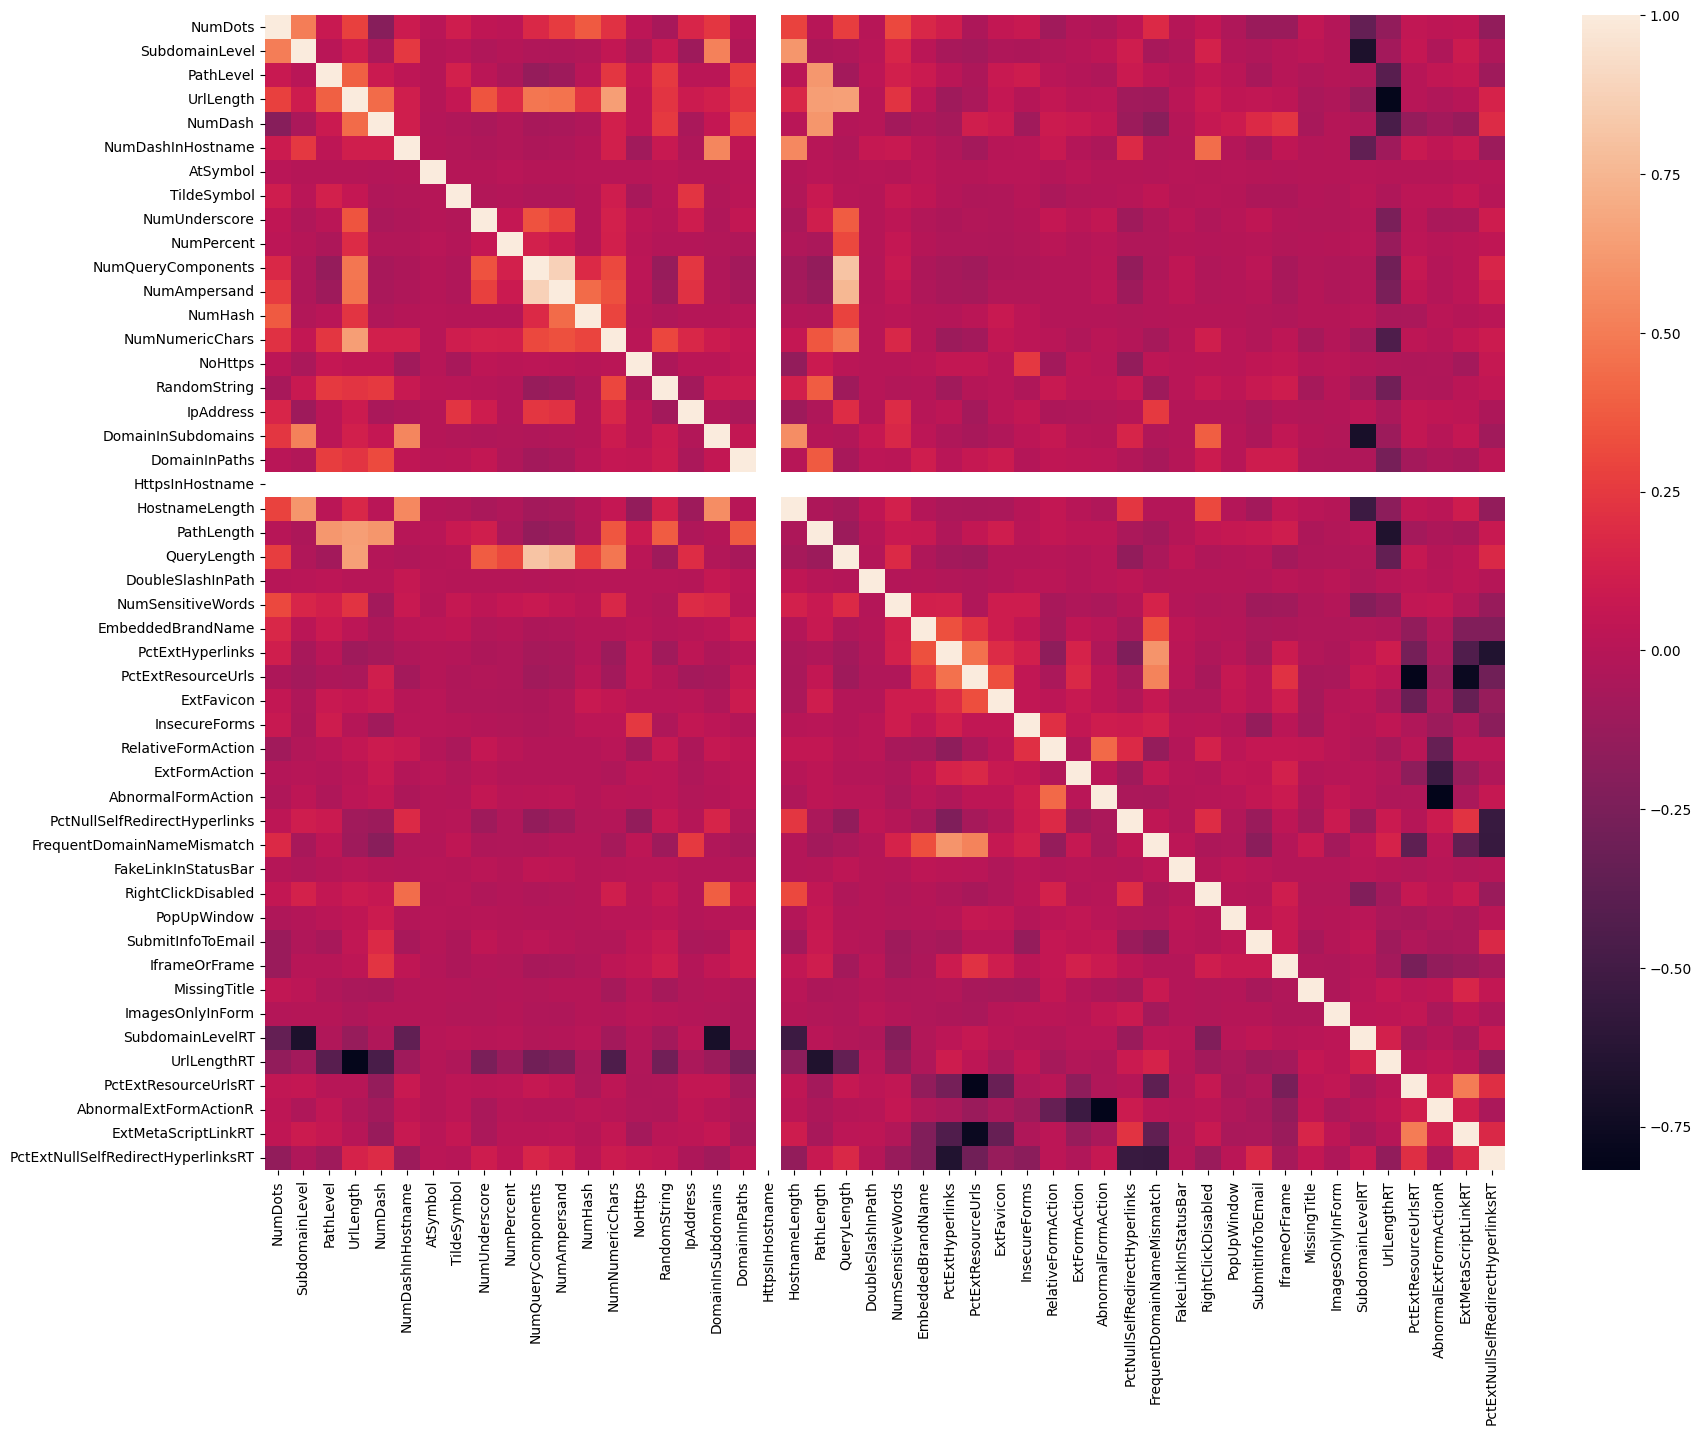

In [58]:
#correlation between each value, relationship between each value
plt.figure(figsize=(20,15))
sns.heatmap(x.corr())
plt.show()

In [59]:
x.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.128800,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.334995,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
x.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [61]:
x

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,-1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,0,1,-1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,1,0,-1,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,1,-1,1,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,...,0,1,0,0,1,1,-1,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,50,0,0,0,0,0,0,...,0,0,0,0,1,1,-1,1,0,1
9996,2,1,4,59,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
9997,2,1,4,57,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
9998,3,1,1,49,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,1


In [62]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: CLASS_LABEL, Length: 10000, dtype: int64

In [63]:

# Split the dataset into training and testing sets
#use a specific starting point for generating random numbers
#useful in situations where we want to reproduce the same results over and over again 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Create the logistic regression model
#stores only a few vectors that represent the gradients approximation implicitly
#better convergence on relatively small datasets.
#limited memory broyden fletcher goldfarb shanno algorithm

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model on the training set
logreg.fit(X_train, y_train) 

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# Evaluate the accuracy of the model
#ratio between the number of correct predictions to the total number of predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.92875


c:\Users\Snigdha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
#true positive, false positive
#false negative, true negative
tn,fp,fn,tp=confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix(y_test, y_pred))


[[1799  143]
 [ 142 1916]]


In [72]:
#specificity
#true negative rate
sp=tp/(tp+fn)
print(sp*100)

93.10009718172984


In [69]:
#sensitivity
#true positive rate
se=tn/(fn+tn)
print(se*100)

92.68418341061309


In [66]:
#precision: ratio of correctly classfified positive samples to total no of classified samples
#recall:how many actual positive labels are correctly indentified 
#f1:measures the models accuracy by combining the precision and recall scores of a model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1942
           1       0.93      0.93      0.93      2058

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000

